<a href="https://colab.research.google.com/github/ChandradityaParmar/Generating-2D-Word-Embeddings-from-a-Co-occurrence-Matrix/blob/main/Co_occurrence_Matrix_and_Word_Embeddings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import re

corpus = """
The universe is a vast expanse of space and time. Space contains planets, stars, galaxies, and other forms of matter and energy.
Galaxies are sprawling systems of stars, stellar remnants, interstellar gas, dust, and dark matter, bound together by gravity.
Stars are luminous spheres of plasma held together by their own gravity. The nearest star to Earth is the Sun.
Planets are astronomical bodies orbiting a star. Earth is a planet in our solar system, which is part of the Milky Way galaxy.
"""

In [2]:
def preprocess_text(text):
    """
    Preprocesses the text by converting to lowercase, removing punctuation, and splitting into words.
    """
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text) # Remove punctuation
    words = text.split()
    return words

In [3]:
# Preprocess the corpus
words = preprocess_text(corpus)

def get_distinct_words(corpus_words):
    """
    b. Method to work out the distinct words (word types) that occur in the corpus.

    Args:
        corpus_words (list): A list of words from the corpus.

    Returns:
        tuple: A tuple containing a list of unique words (vocabulary) and a mapping from word to its index.
    """
    word_set = sorted(list(set(corpus_words)))
    word_to_index = {word: i for i, word in enumerate(word_set)}
    print(f"Found {len(word_set)} distinct words.")
    return word_set, word_to_index

In [7]:
def build_cooccurrence_matrix(corpus_words, word_to_index, window_size=4):
    """
    c. Method that constructs a co-occurrence matrix for a certain window-size n.

    Args:
        corpus_words (list): The list of words in the corpus.
        word_to_index (dict): A dictionary mapping each unique word to an integer index.
        window_size (int): The number of words to consider before and after the center word.

    Returns:
        numpy.ndarray: The co-occurrence matrix.
    """
    vocab_size = len(word_to_index)
    # Initialize a square matrix of zeros with dimensions equal to the vocabulary size
    co_occurrence_matrix = np.zeros((vocab_size, vocab_size), dtype=np.int32)
    # Iterate through each word in the corpus
    for i, center_word in enumerate(corpus_words):
        center_word_index = word_to_index[center_word]

        # Define the start and end of the context window
        start_index = max(0, i - window_size)
        end_index = min(len(corpus_words), i + window_size + 1)

        # Iterate through the context window
        for j in range(start_index, end_index):
            # Skip the center word itself
            if i == j:
                continue

            context_word = corpus_words[j]
            context_word_index = word_to_index[context_word]

            # Increment the count for the co-occurring pair
            co_occurrence_matrix[center_word_index, context_word_index] += 1

    print(f"Constructed a {vocab_size}x{vocab_size} co-occurrence matrix with window size {window_size}.")
    return co_occurrence_matrix

In [8]:
def reduce_dimensionality(matrix, k=2):
    """
    d. Method that performs dimensionality reduction on the matrix to produce k-dimensional embeddings.
    Here we use Principal Component Analysis (PCA) for reduction.

    Args:
        matrix (numpy.ndarray): The co-occurrence matrix.
        k (int): The target number of dimensions for the embeddings.

    Returns:
        numpy.ndarray: The reduced k-dimensional word embeddings.
    """
    if k >= matrix.shape[1]:
        print(f"Warning: Target dimension k={k} is not less than the original dimension {matrix.shape[1]}. Returning original matrix.")
        return matrix

    pca = PCA(n_components=k)
    # Fit PCA on the matrix and transform it to the reduced dimension
    embeddings = pca.fit_transform(matrix)
    print(f"Reduced matrix dimensions from {matrix.shape[1]} to {k}.")
    return embeddings

In [9]:
def plot_embeddings(embeddings, word_labels):
    """
    e. Function to plot a set of 2D vectors in 2D space.

    Args:
        embeddings (numpy.ndarray): The 2D word embeddings (a matrix where each row is a word vector).
        word_labels (list): A list of words corresponding to each row in the embeddings matrix.
    """
    if embeddings.shape[1] != 2:
        print("Cannot plot embeddings that are not 2D.")
        return

    plt.figure(figsize=(12, 12))

    # Plot each word vector as a point
    plt.scatter(embeddings[:, 0], embeddings[:, 1])

    # Annotate each point with its corresponding word label
    for i, word in enumerate(word_labels):
        plt.annotate(word, (embeddings[i, 0], embeddings[i, 1]),
                     xytext=(5, 2), textcoords='offset points', ha='right', va='bottom')

    plt.title('2D Word Embeddings from Co-occurrence Matrix')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.grid(True)
    plt.show()

Found 55 distinct words.
Constructed a 55x55 co-occurrence matrix with window size 4.
Reduced matrix dimensions from 55 to 2.


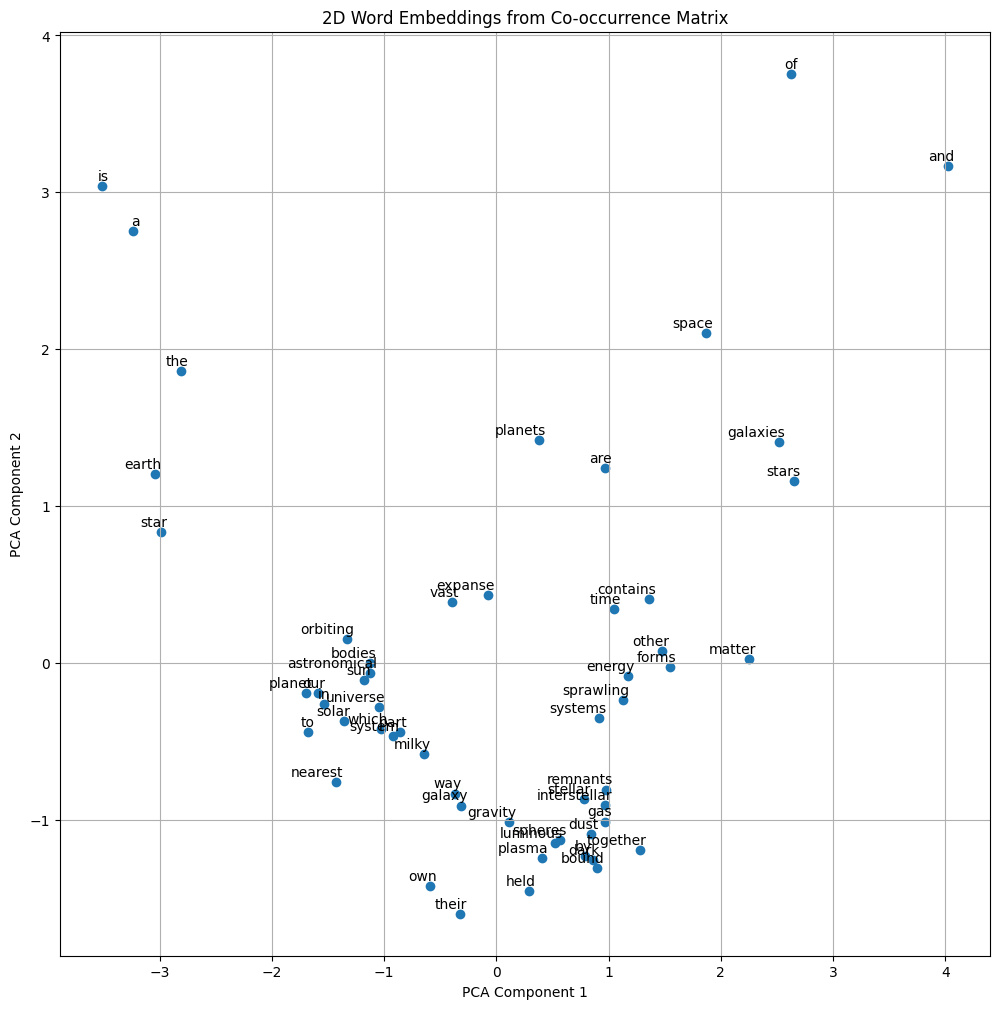

In [10]:
# --- Main Execution ---
if __name__ == "__main__":
    # a. Plot co-occurrence word embeddings (this is the final step that uses all methods)

    # b. Get distinct words
    vocabulary, w_to_i = get_distinct_words(words)

    # c. Construct the co-occurrence matrix
    co_occurrence_matrix = build_cooccurrence_matrix(words, w_to_i, window_size=4)

    # d. Perform dimensionality reduction
    # We reduce to 2 dimensions for plotting
    word_embeddings_2d = reduce_dimensionality(co_occurrence_matrix, k=2)

    # e. Plot the 2D vectors
    plot_embeddings(word_embeddings_2d, vocabulary)